In [119]:
import pandas as pd
pet= pd.read_csv('pet_supplies_2212.csv', index_col=0)
pet.head()

,category,animal,size,price,sales,rating,repeat_purchase
product_id,,,,,,,
1,Food,Bird,large,51.1,1860.62,7.0,1
2,Housing,Bird,MEDIUM,35.98,963.60,6.0,0
3,Food,Dog,medium,31.23,898.30,5.0,1
4,Medicine,Cat,small,24.95,982.15,6.0,1
5,Housing,Cat,Small,26.18,832.63,7.0,1


In [9]:
pet.dtypes

category            object
animal              object
size                object
price               object
sales              float64
rating             float64
repeat_purchase      int64
dtype: object

In [121]:
pet['price'] = pd.to_numeric(pet.price, errors='coerce')
pet['repeat_purchase']= pet['repeat_purchase'].astype(str)

In [122]:
pet.dtypes

category            object
animal              object
size                object
price              float64
sales              float64
rating             float64
repeat_purchase     object
dtype: object

In [123]:
pet.isna().any()

category           False
animal             False
size               False
price               True
sales              False
rating              True
repeat_purchase    False
dtype: bool

In [124]:
pet.isna().sum()

category             0
animal               0
size                 0
price              150
sales                0
rating             150
repeat_purchase      0
dtype: int64

In [127]:
pet['size'].unique()

array(['large', 'MEDIUM', 'medium', 'small', 'Small', 'Large', 'SMALL',
       'Medium', 'LARGE'], dtype=object)

In [138]:
pet['size']= pet['size'].str.replace('large', 'Large', case= False)
pet['size']= pet['size'].str.replace('medium', 'Medium', case= False)
pet['size']= pet['size'].str.replace('small', 'Small', case= False)

In [139]:
pet['size'].unique()

array(['Large', 'Medium', 'Small'], dtype=object)

In [136]:
pet['repeat_purchase']= pet['repeat_purchase'].str.replace('1', 'repeat_purchases')
pet['repeat_purchase']= pet['repeat_purchase'].str.replace('0', 'non_repeat_purchases')

In [140]:
pet['repeat_purchase'].unique()

array(['repeat_purchases', 'non_repeat_purchases'], dtype=object)

In [141]:
mean= pet['price'].mean()
print(mean)
median= pet['price'].median()
print(median)

29.42430370370373
28.064999999999998


In [142]:
pet['price'].fillna(mean, inplace = True)

In [143]:
pet['rating'].fillna(0, inplace = True)

In [144]:
pet.isna().sum()

category           0
animal             0
size               0
price              0
sales              0
rating             0
repeat_purchase    0
dtype: int64

In [154]:
pet.head()

,category,animal,size,price,sales,rating,repeat_purchase
product_id,,,,,,,
1,Food,Bird,Large,51.10,1860.62,7.0,repeat_purchases
2,Housing,Bird,Medium,35.98,963.60,6.0,non_repeat_purchases
3,Food,Dog,Medium,31.23,898.30,5.0,repeat_purchases
4,Medicine,Cat,Small,24.95,982.15,6.0,repeat_purchases
5,Housing,Cat,Small,26.18,832.63,7.0,repeat_purchases


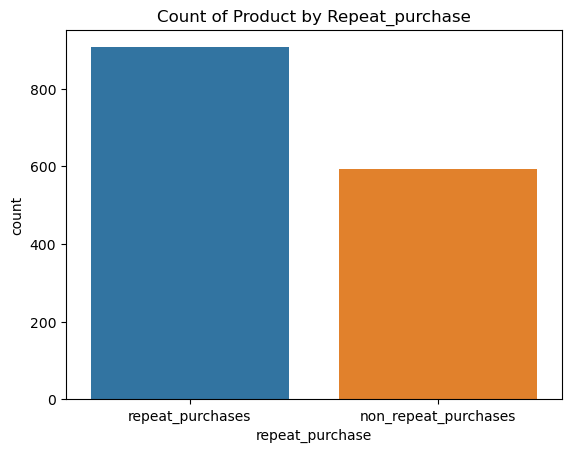

repeat_purchase
non_repeat_purchases    594
repeat_purchases        906
Name: sales, dtype: int64


In [153]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
g= sns.countplot(x= 'repeat_purchase', data= pet)
g.set_title('Count of Product by Repeat_purchase')
plt.show()

Count_of_Product_by_Repeat_purchase = pet.groupby('repeat_purchase')['sales'].count()
print(Count_of_Product_by_Repeat_purchase)

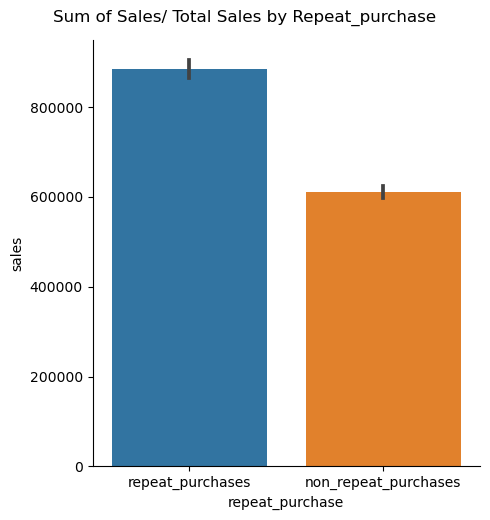

In [146]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
g= sns.catplot(x='repeat_purchase', y= 'sales', data= pet, kind= 'bar', estimator=sum)
g.fig.suptitle('Sum of Sales/ Total Sales by Repeat_purchase', y= 1.03)
plt.show()

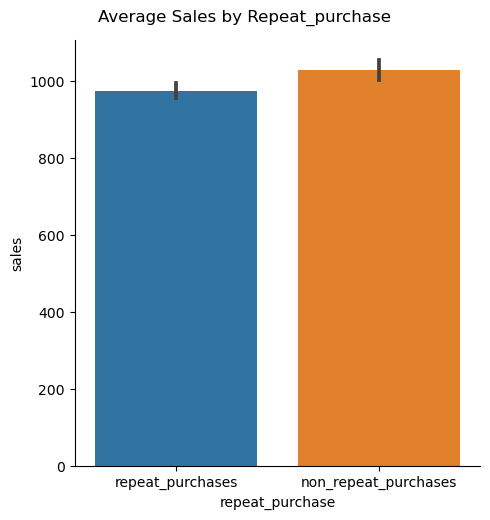

In [147]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
g= sns.catplot(x='repeat_purchase', y= 'sales', data= pet, kind= 'bar')
g.fig.suptitle('Average Sales by Repeat_purchase', y=1.03)
plt.show()

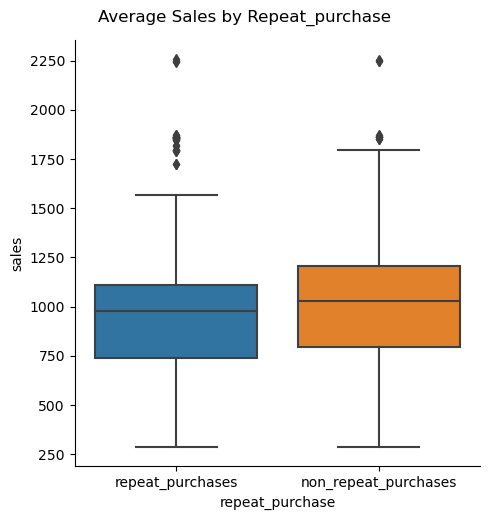

In [148]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
g= sns.catplot(x='repeat_purchase', y= 'sales', data= pet, kind= 'box')
g.fig.suptitle('Average Sales by Repeat_purchase', y=1.03)
plt.show()

In [149]:
xbar= pet.groupby('repeat_purchase')['sales'].mean()
print(xbar)

repeat_purchase
non_repeat_purchases    1028.368013
repeat_purchases         975.768400
Name: sales, dtype: float64


In [150]:
s= pet.groupby('repeat_purchase')['sales'].std()
print(s)

repeat_purchase
non_repeat_purchases    316.915770
repeat_purchases        326.985415
Name: sales, dtype: float64


In [151]:
n= pet.groupby('repeat_purchase')['sales'].count()
print(n)

repeat_purchase
non_repeat_purchases    594
repeat_purchases        906
Name: sales, dtype: int64


In [152]:
x_reap= 975.768400
x_non_reap= 1028.368013
s_reap = 326.985415
s_non_reap= 316.915770
n_reap = 906
n_non_reap= 594
dfe= n_non_reap + n_reap - 2

import numpy as np
numerator= x_non_reap- x_reap
denominator= np.sqrt(s_non_reap ** 2 /n_non_reap + s_reap ** 2/ n_reap)
t_stat= numerator/denominator
print(t_stat)

from scipy.stats import t
1- t.cdf(t_stat, df=dfe)

3.104336962632329


0.0009713842554160967